In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl

bid_matrix = np.load('bid_mat_policy_iteration.npy')
ask_matrix = np.load('ask_mat_policy_iteration.npy')  
reward_distribution = np.load('reward_distribution_policy_iteration.npy')

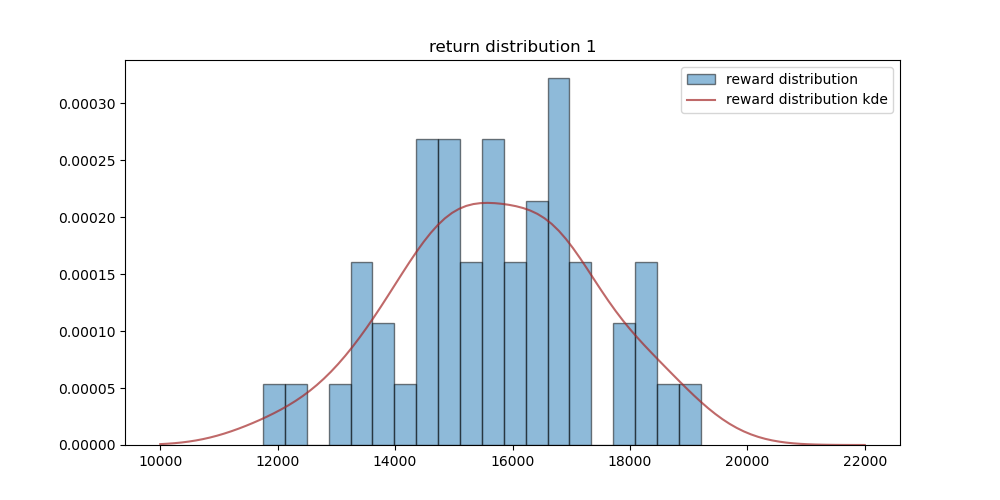

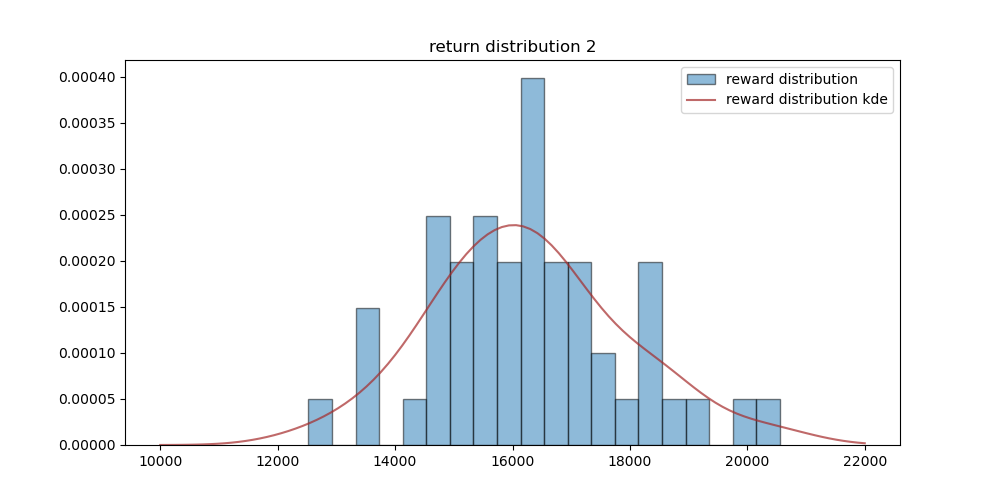

C:\Users\specf\AppData\Local\Temp\ipykernel_20744\1446924037.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 5))


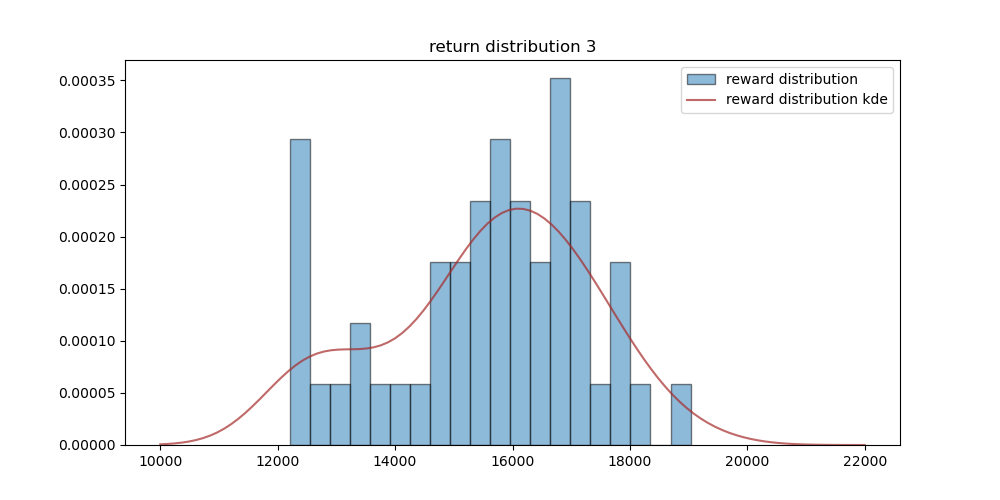

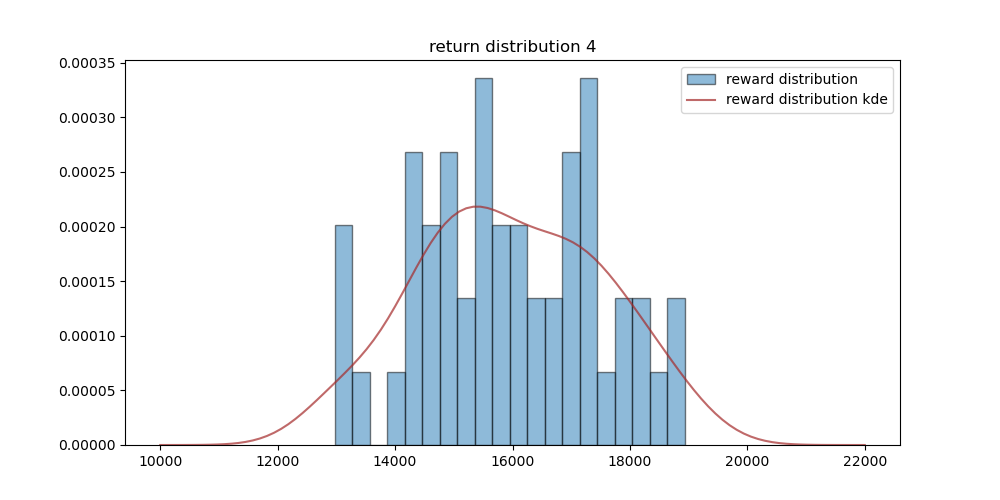

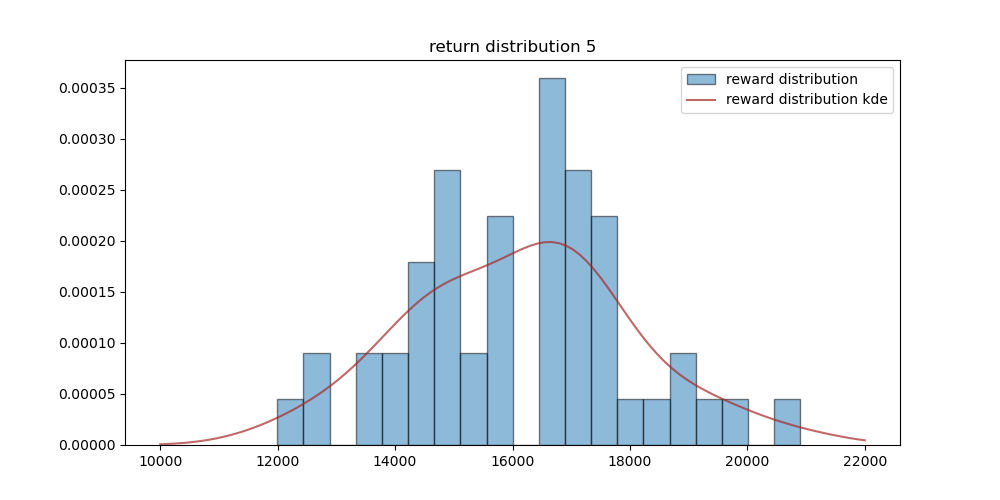

In [8]:
from scipy.stats import gaussian_kde
for i in range(5):
    kde = gaussian_kde(reward_distribution[i])
    x = np.linspace(10000, 22000, 100)
    plt.figure(figsize=(10, 5))
    plt.title('return distribution {}'.format(i + 1))
    plt.hist(reward_distribution[i], bins=20, density=True, label='reward distribution', edgecolor='black', alpha=0.5)
    plt.plot(x, kde(x), label='reward distribution kde', color='brown', alpha = 0.7)
    plt.legend()
    plt.savefig('reward_distribution {}.png'.format(i))
    plt.show()

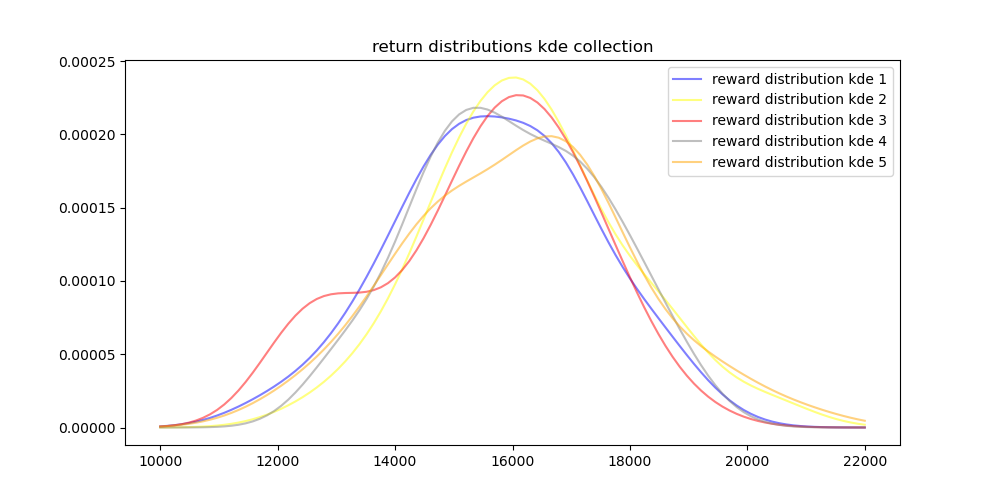

In [9]:
colors = ['blue', 'yellow', 'red', 'grey', 'orange']
plt.figure(figsize=(10, 5))
plt.title('return distributions kde collection')
for i in range(5):
    kde = gaussian_kde(reward_distribution[i])
    x = np.linspace(10000, 22000, 100)
    plt.plot(x, kde(x), label='reward distribution kde {}'.format(i + 1), color = colors[i], alpha=0.5)
plt.legend()
plt.savefig('reward_distribution_kde_collection.png')
plt.show()

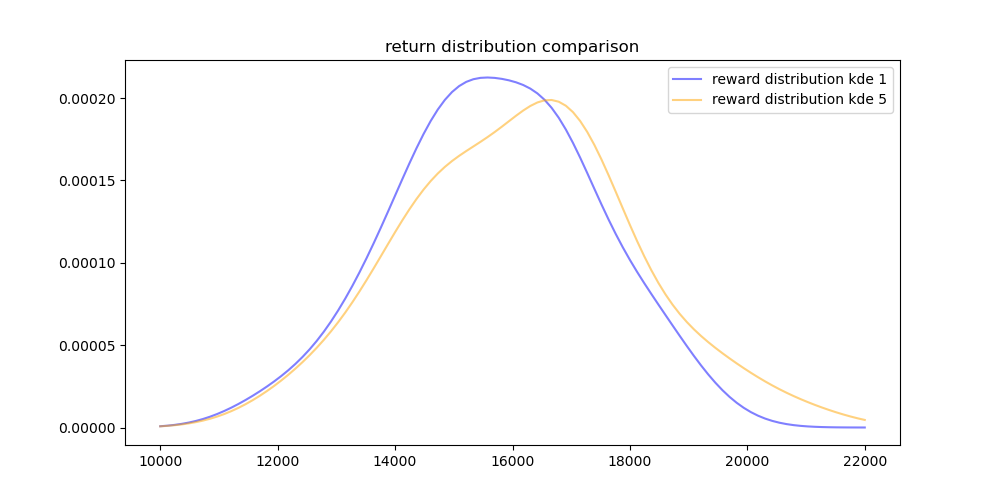

In [10]:
plt.figure(figsize=(10, 5))
plt.title('return distribution comparison')
kde1 = gaussian_kde(reward_distribution[0])
kde2 = gaussian_kde(reward_distribution[4])
x = np.linspace(10000, 22000, 100)
plt.plot(x, kde1(x), label='reward distribution kde 1', color = 'blue', alpha=0.5)
plt.plot(x, kde2(x), label='reward distribution kde 5', color = 'orange', alpha=0.5)
plt.legend()
plt.savefig('reward_distribution_comparison.png')
plt.show()

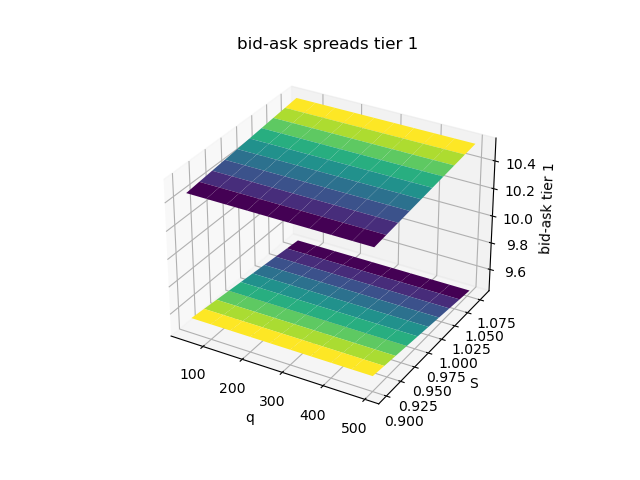

In [16]:
t_mat = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] #i
S_mat = [0.9, 0.92, 0.94, 0.96, 0.98, 1, 1.02, 1.04, 1.06, 1.08] #k
q_mat = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500] #j

bid_ask_mat0 = bid_matrix[0, :, :, 0] 
bid_ask_mat1 = ask_matrix[0, :, :, 0]

from mpl_toolkits.mplot3d import Axes3D

X, Y = np.meshgrid(q_mat, S_mat)

# Create figure and axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, bid_ask_mat0, cmap='viridis')
ax.plot_surface(X, Y, bid_ask_mat1, cmap='viridis')

# Set labels and title
ax.set_xlabel('q')
ax.set_ylabel('S')
ax.set_zlabel('bid-ask tier 1')
plt.title('bid-ask spreads tier 1')
plt.savefig('bid_ask_tier1 policy_iteration.png')
# Show the plot
plt.show()

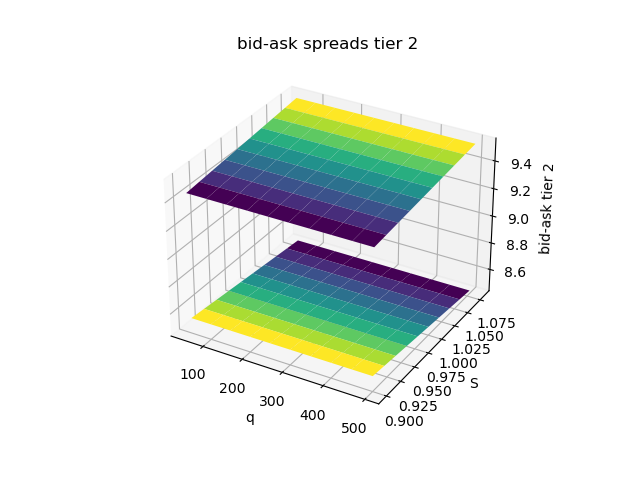

In [15]:
t_mat = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] #i
S_mat = [0.9, 0.92, 0.94, 0.96, 0.98, 1, 1.02, 1.04, 1.06, 1.08] #k
q_mat = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500] #j

bid_ask_mat0 = bid_matrix[0, :, :, 1] 
bid_ask_mat1 = ask_matrix[0, :, :, 1]

from mpl_toolkits.mplot3d import Axes3D

X, Y = np.meshgrid(q_mat, S_mat)

# Create figure and axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, bid_ask_mat0, cmap='viridis')
ax.plot_surface(X, Y, bid_ask_mat1, cmap='viridis')

# Set labels and title
ax.set_xlabel('q')
ax.set_ylabel('S')
ax.set_zlabel('bid-ask tier 2')
plt.title('bid-ask spreads tier 2')
plt.savefig('bid_ask_tier2 policy_iteration.png')
# Show the plot
plt.show()

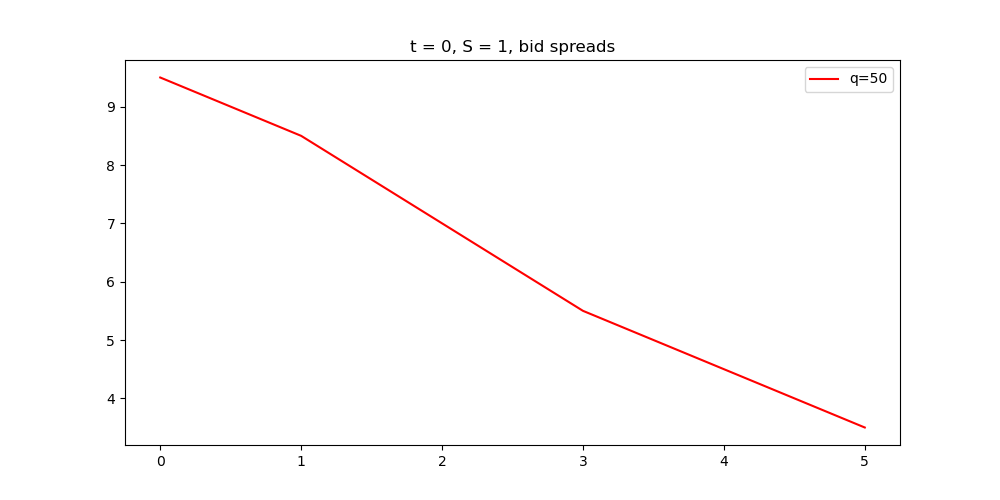

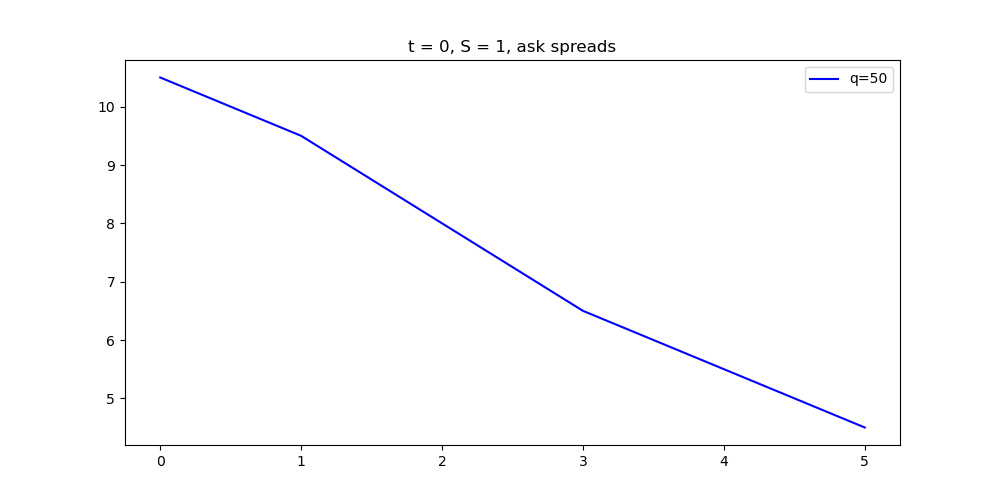

In [14]:

plt.figure(figsize=(10, 5))
plt.title('t = 0, S = 1, bid spreads')
plt.plot(bid_matrix[0][5][0], label='q=50', color='red')
plt.legend()
plt.savefig('t = 0, S = 1, bid policy iteration.png')
plt.show()

plt.figure(figsize=(10, 5))
plt.title('t = 0, S = 1, ask spreads')
plt.plot(ask_matrix[0][5][0], label='q=50', color='blue')

plt.legend()
plt.savefig('t = 0, S = 1, ask policy iteration.png')
plt.show()